# This notebook will give you a basic introduction to using machine learning with the Iris dataset.
You can extend this by trying different models, tuning hyperparameters, and evaluating different metrics.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

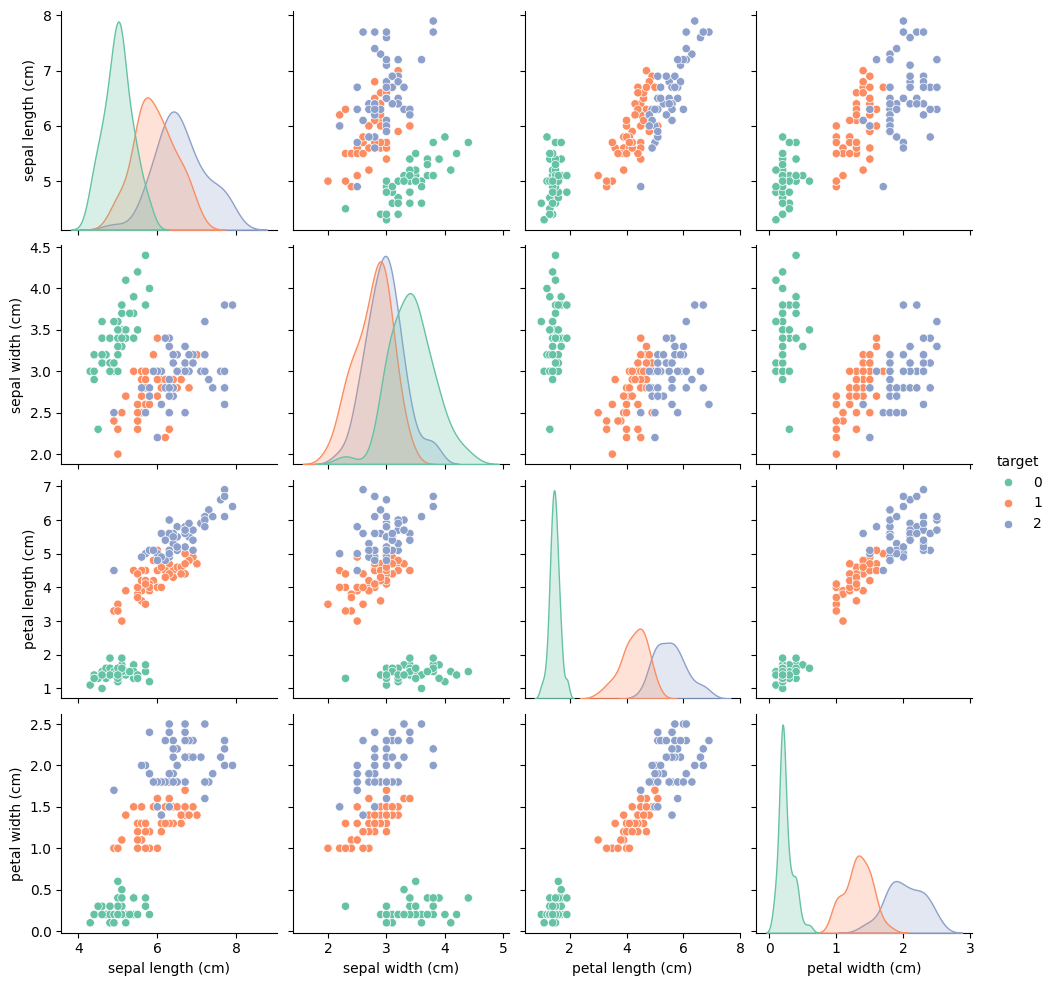

In [5]:
# Visualizations
sns.pairplot(df, hue="target", palette="Set2")
plt.show()

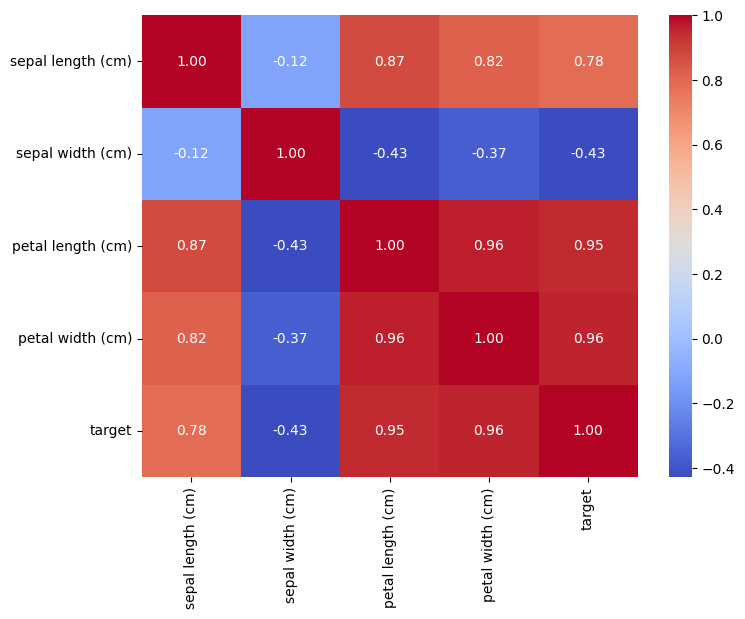

In [6]:
corr_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

/tmp/ipython-input-2232100024.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='target', palette='Set2')


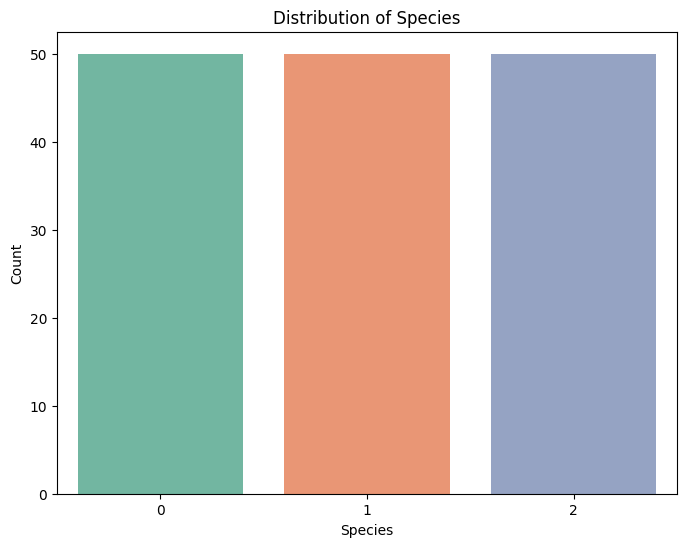

In [7]:
# Plot the distribution of the target variable (species)
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='target', palette='Set2')
plt.title('Distribution of Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()


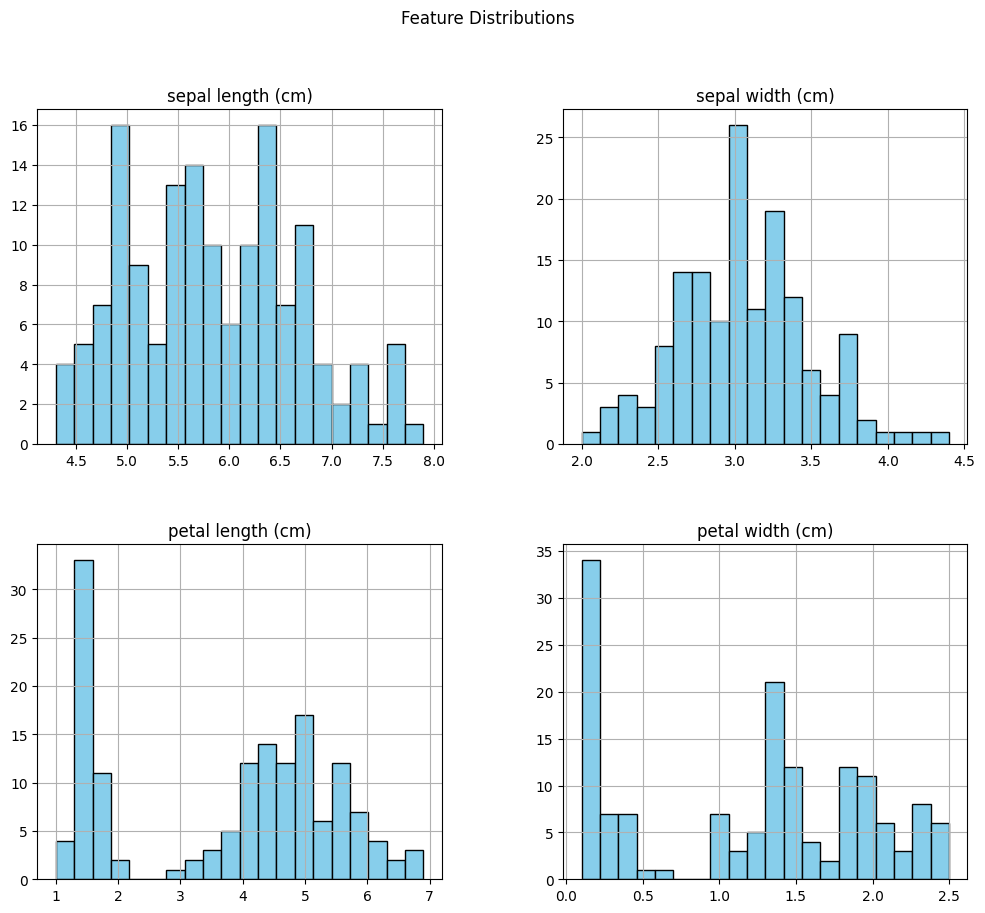

In [8]:
# Histograms of the features
df[iris.feature_names].hist(bins=20, figsize=(12, 10), layout=(2, 2), color='skyblue', edgecolor='black')
plt.suptitle('Feature Distributions')
plt.show()




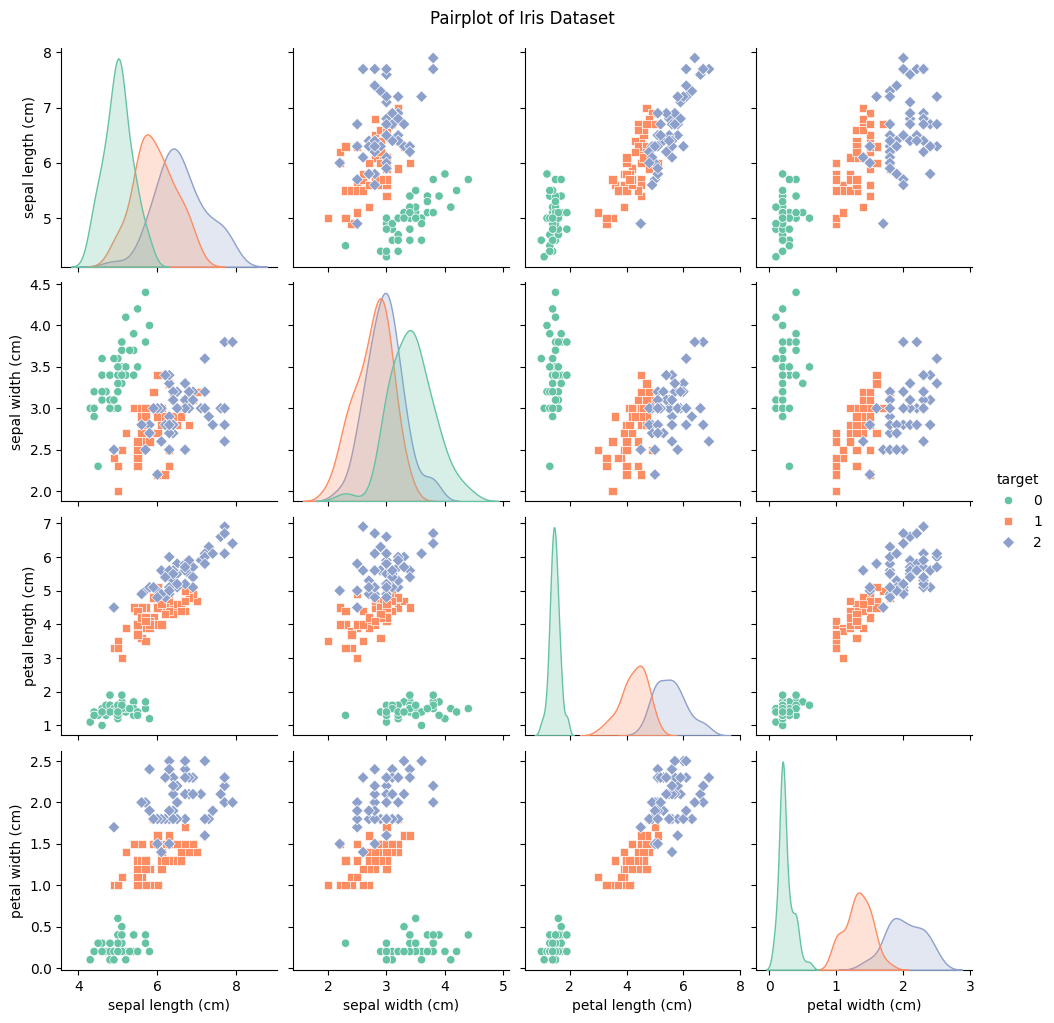

In [9]:
# Pairplot of the features colored by the target variable (species)
sns.pairplot(df, hue='target', palette='Set2', markers=["o", "s", "D"])
plt.suptitle('Pairplot of Iris Dataset', y=1.02)
plt.show()

/tmp/ipython-input-2884232205.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=feature, data=df, palette='Set2')
/tmp/ipython-input-2884232205.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=feature, data=df, palette='Set2')
/tmp/ipython-input-2884232205.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=feature, data=df, palette='Set2')
/tmp/ipython-input-2884232205.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` v

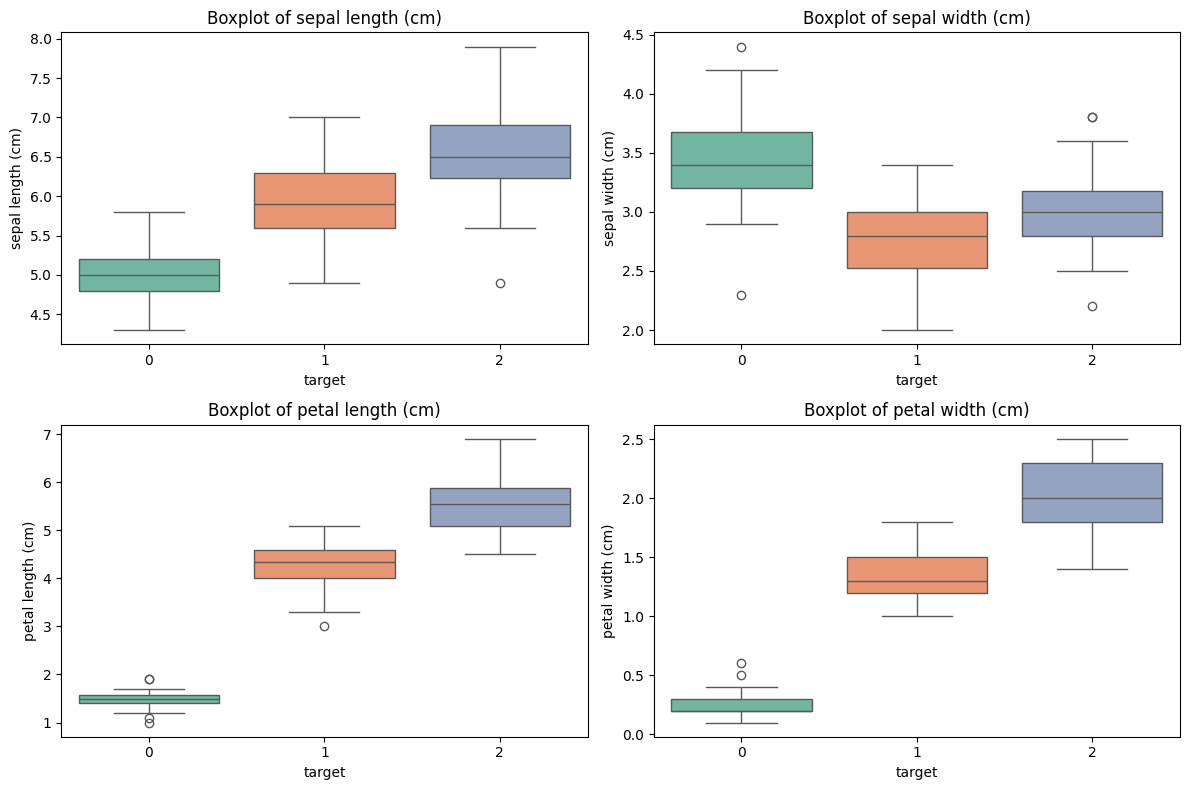

In [10]:
# Boxplots for each feature to check for outliers
plt.figure(figsize=(12, 8))
for i, feature in enumerate(iris.feature_names):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='target', y=feature, data=df, palette='Set2')
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()




In [11]:
# Compute correlation matrix
corr_matrix = df[iris.feature_names].corr()

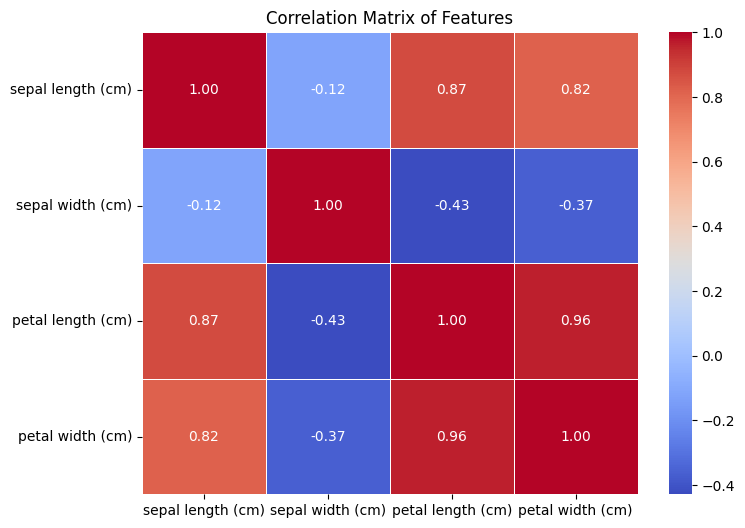

In [12]:
# Compute correlation matrix
corr_matrix = df[iris.feature_names].corr()

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()




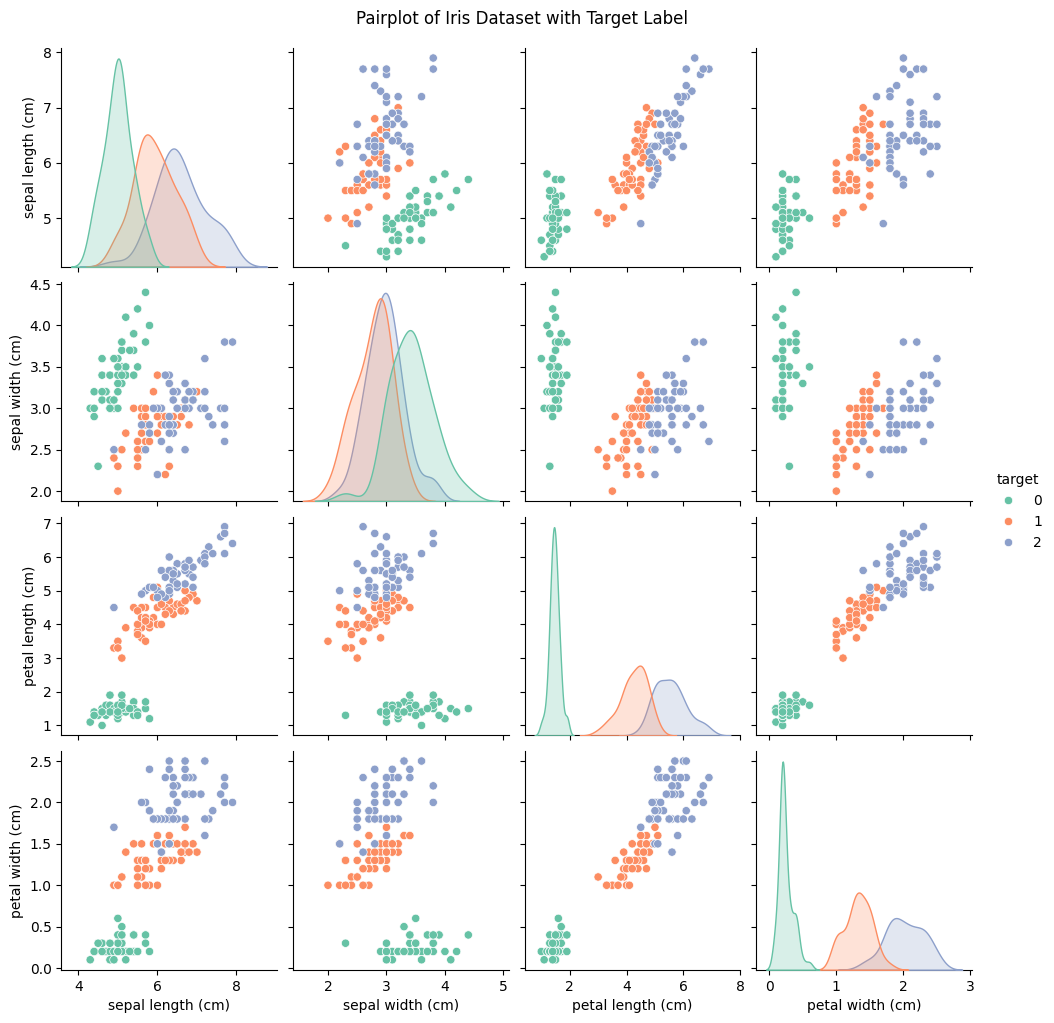

In [13]:
# Pairplot showing relationships between features with target hue
sns.pairplot(df, hue="target", palette="Set2")
plt.suptitle('Pairplot of Iris Dataset with Target Label', y=1.02)
plt.show()


/tmp/ipython-input-4021257534.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='target', y=feature, data=df, palette='Set2')
/tmp/ipython-input-4021257534.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='target', y=feature, data=df, palette='Set2')
/tmp/ipython-input-4021257534.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='target', y=feature, data=df, palette='Set2')
/tmp/ipython-input-4021257534.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign 

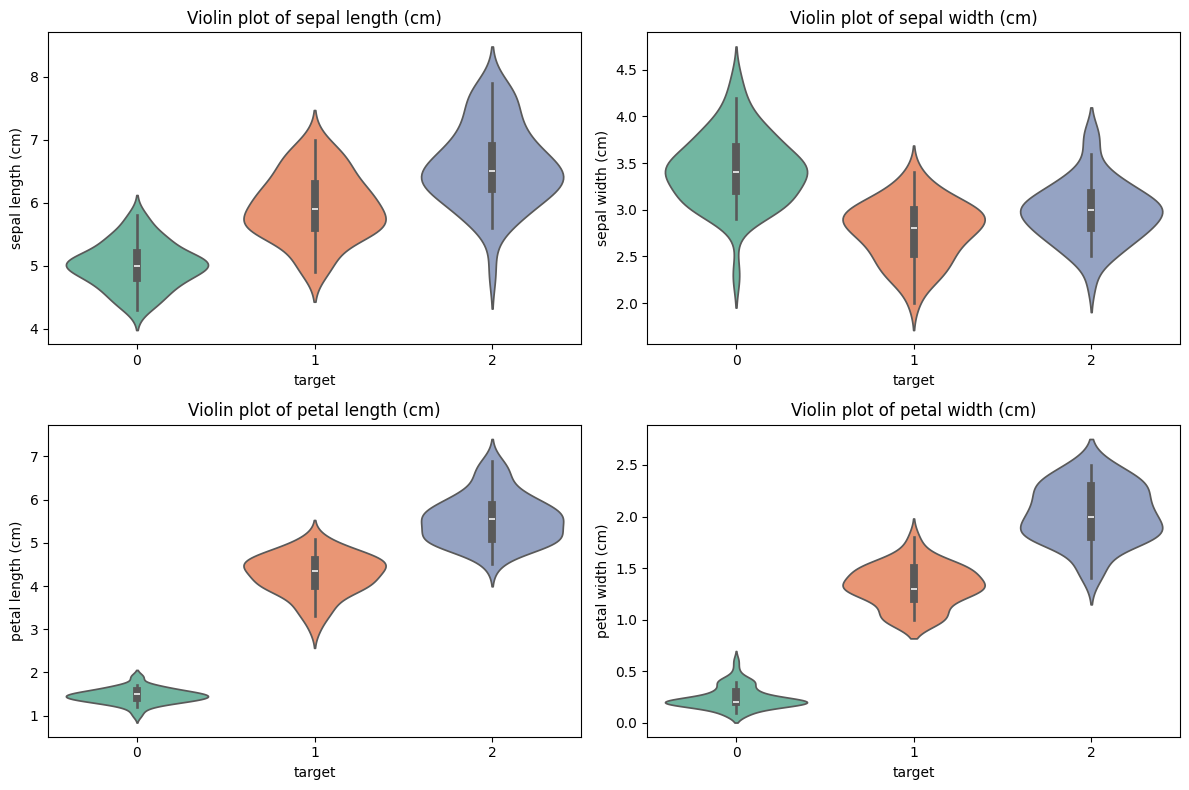

In [14]:
# Violin plot for each feature by class
plt.figure(figsize=(12, 8))
for i, feature in enumerate(iris.feature_names):
    plt.subplot(2, 2, i+1)
    sns.violinplot(x='target', y=feature, data=df, palette='Set2')
    plt.title(f'Violin plot of {feature}')
plt.tight_layout()
plt.show()

In [18]:
# Train a Random Forest model to compute feature importance
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [19]:
# Get feature importance
feature_importance = pd.DataFrame({'feature': iris.feature_names, 'importance': rf_model.feature_importances_})
feature_importance = feature_importance.sort_values(by='importance', ascending=False)

In [20]:
# Split the data into training and testing sets
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

/tmp/ipython-input-725372316.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importance, palette='Set2')


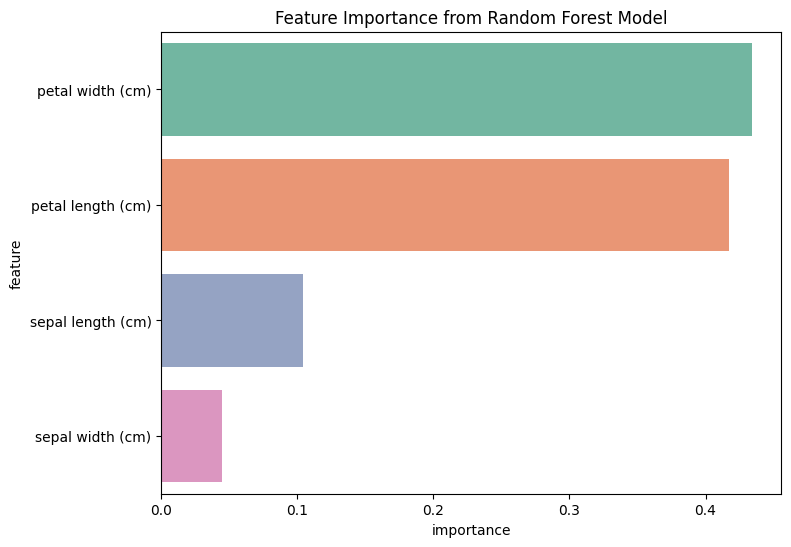

In [21]:
# Plot feature importance
plt.figure(figsize=(8, 6))
sns.barplot(x='importance', y='feature', data=feature_importance, palette='Set2')
plt.title('Feature Importance from Random Forest Model')
plt.show()


In [22]:
from sklearn.decomposition import PCA

# Apply PCA to reduce to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [23]:
# Create a DataFrame with PCA components
pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
pca_df['target'] = y

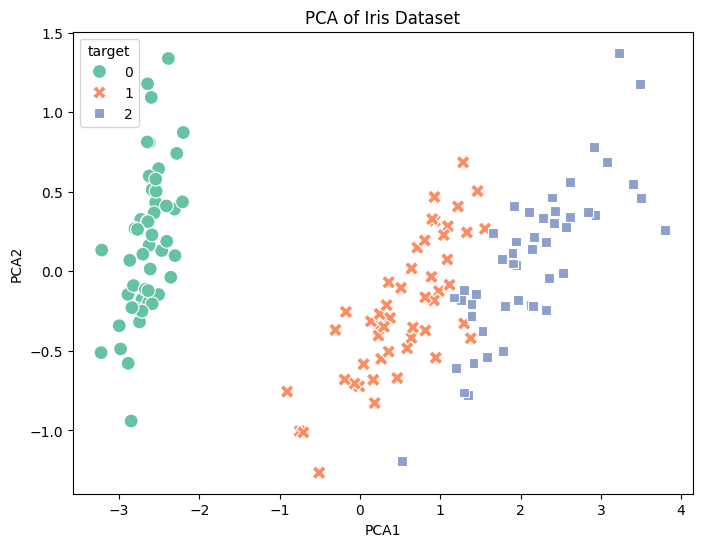

In [24]:
# Plot the 2D PCA components
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='target', palette='Set2', style='target', s=100)
plt.title('PCA of Iris Dataset')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()


In [25]:
# Prepare data
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
# Logistic Regression
lr_model = LogisticRegression(max_iter=200)
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))


Logistic Regression Accuracy: 1.0


In [28]:
# SVC
svc_model = SVC(kernel='linear')
svc_model.fit(X_train_scaled, y_train)
y_pred_svc = svc_model.predict(X_test_scaled)
print("SVC Accuracy:", accuracy_score(y_test, y_pred_svc))


SVC Accuracy: 0.9666666666666667


In [29]:
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))


Decision Tree Accuracy: 1.0


In [30]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Accuracy: 1.0


In [31]:
# Comparing performances
models = ['Logistic Regression', 'SVC', 'Decision Tree', 'Random Forest']
accuracies = [
    accuracy_score(y_test, y_pred_lr),
    accuracy_score(y_test, y_pred_svc),
    accuracy_score(y_test, y_pred_dt),
    accuracy_score(y_test, y_pred_rf)
]
accuracy_df = pd.DataFrame({'Model': models, 'Accuracy': accuracies})
accuracy_df.sort_values(by='Accuracy', ascending=False, inplace=True)
accuracy_df

,Model,Accuracy
0,Logistic Regression,1.000000
2,Decision Tree,1.000000
3,Random Forest,1.000000
1,SVC,0.966667


In [32]:
# prompt: Using dataframe accuracy_df: plotly

import plotly.express as px

# Create a bar chart using Plotly Express
fig = px.bar(accuracy_df, x='Model', y='Accuracy', title='Model Accuracy Comparison')

# Customize the chart (optional)
fig.update_layout(xaxis_title='Model', yaxis_title='Accuracy')

# Show the chart
fig.show()



Conclusion

These EDA techniques give you a deeper understanding of the Iris dataset. By visualizing distributions, relationships between features, correlations, and outliers, you can make informed decisions about preprocessing steps and feature selection for your machine learning models. It's always a good idea to explore the data thoroughly before diving into model building, as this can lead to better performance and insights.

After running the models and comparing their performance, you should have a good idea of which one works best for the Iris dataset. Typically, you’ll see that models like Random Forest or SVC perform better in terms of accuracy, but it depends on the specific requirements (interpretability, speed, etc.) for your use case.
